"Daha önceki tıklama oranlarına bakarak kullanıcıların karşısına hangi reklamı çıkarmalıyız? " sorusuna cevap arayalım.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## UCB kullanmadan sadece random seçim yaparak gidelim.

In [3]:
import random 

In [4]:
N = len(data)
d = len(data.columns)
total = 0 
chozen_ads = []

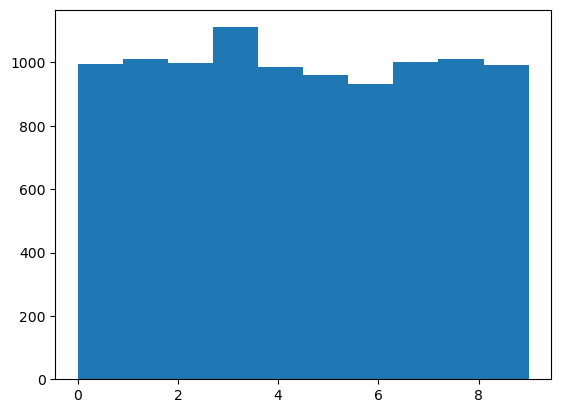

In [5]:
for n in range(0,N):
    ad = random.randrange(10)
    chozen_ads.append(ad)
    odul = data.values[d,ad] 
    total = total + odul
    
    
plt.hist(chozen_ads)
plt.show()

## Şimdi UCB kullanalım

In [6]:
import math

In [7]:
#Ri(n)
oduller = [0] * d #ilk başta bütün ilanların ödülü 0
#Ni(n)
tiklamalar = [0] * d #o ana kadarki tıklamalar
toplam = 0 # toplam ödül
secilenler = []

In [8]:
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i          
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = data.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)

Toplam Odul:
2231


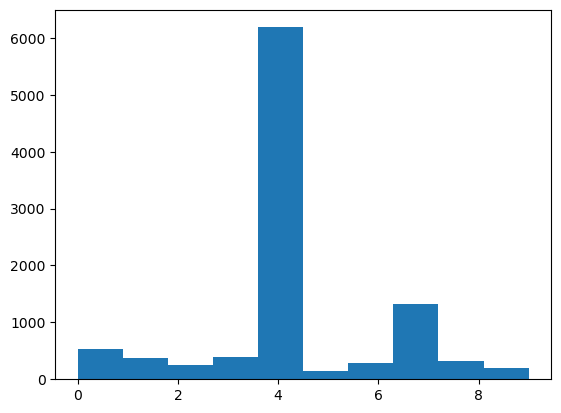

In [10]:
plt.hist(secilenler)
plt.show()

Bu çıktıya göre 4.indexteki reklamı(5.reklam) sunmak en iyisi. 